## Clustering Exercise ##

Clustering is a method belonging to unsupervised machine learning where objects with similar features are grouped together in so-called clusters. 



The most popular clustering method is the k-means algorithms. 
The first step in this method is to specify  the desired number of clusters k and then to randomly chose  k initial cluster centers from the set of given data points.



Afterwards, the following steps are carried out successivley until convergence.

1. The individual vectors are assigned the cluster where their euclidean distance to the associated cluster centroid vector is minimal.


2. The cluster centers are recalculated based on these updated assignments.


In [18]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import sys
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

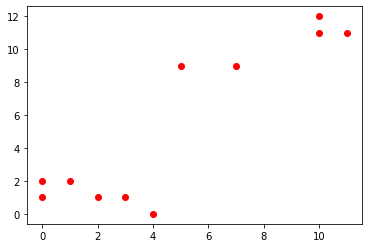

In [19]:
## data to cluster
data=[[4,0],[0,1],[1,2],[2,1],[3,1],[0,2],[5,9],[10,12],[10,11],[11,11],[7,9]]
#data=np.array([[1,5],[3,2]])
x, y = np.array(data).T
plt.scatter(x,y,color="red")
plt.show()

In [3]:
def plot_clusters(data_arg,li_cluster_indices,colors,centroids):
    data_clusters=[]
    for j in range(0,len(li_cluster_indices)):
        data_clusters.append([])
    data_centroid=[]
    
    for i in range(0,len(data_arg)):
        for j in range(0,len(li_cluster_indices)):
            cluster_indices=li_cluster_indices[j]
            if i in cluster_indices:
                data_clusters[j].append(data_arg[i])
    
    for cluster, color in zip(data_clusters,colors):
        x,y=np.array(cluster).T
        plt.scatter(x,y,color=color)
    x,y=np.array(centroids).T
    plt.scatter(x,y,color="blue")
    plt.show()

In [4]:
# calculate square of euclidean distance between two points

def euclidean_distance2(pt1,pt2):
    return np.linalg.norm(pt1-pt2)
    



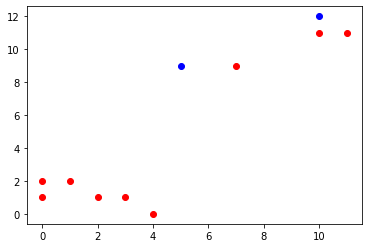

In [5]:
## select the initial centroids
## reshuffle the list randomly

random.shuffle(data)
c1=np.array(data[0])
c2=np.array(data[1])
rest=[]
for i in range(2,len(data)):
    rest.append(i)
plot_clusters(data,[rest],["red"],[c1,c2])
    

adjust clusters


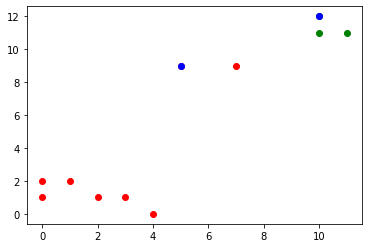

adjust centroids


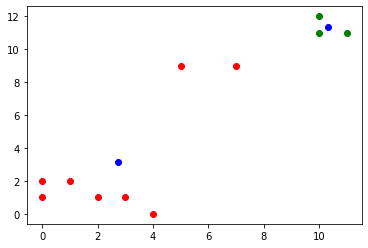

adjust clusters


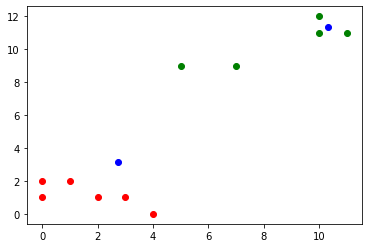

adjust centroids


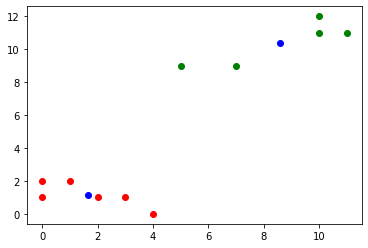

adjust clusters


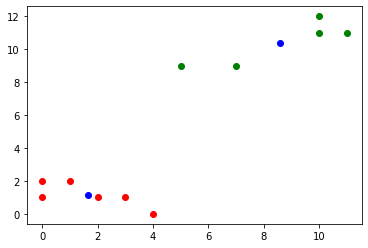

adjust centroids


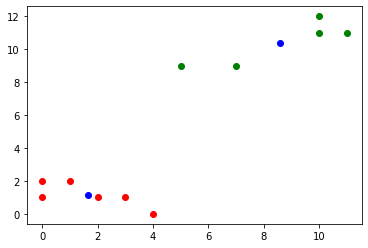

convergence!


In [6]:
cluster1=[]
cluster2=[]
centroid_index1=0
centroid_index2=1
oldc1=c1
oldc2=c2
for k in range(0,10):
        l=0
        cluster1=[]
        cluster2=[]
        for point in data:
            distance_c1=euclidean_distance2(np.array(point),c1)
            distance_c2=euclidean_distance2(np.array(point),c2)
            if distance_c1<distance_c2:
                cluster1.append(l)
            else:
                cluster2.append(l)
            l=l+1
        print ("adjust clusters")
        plot_clusters(data,[cluster1,cluster2],["red","green"],[c1,c2])
        
        c1=np.array([0.0])
        for i in cluster1:
            c1=c1+np.array(data[i])
        c1=c1/len(cluster1)
        
        c2=np.array([0.0])
        for i in cluster2:
            c2=c2+np.array(data[i])
        c2=c2/len(cluster2)
        
        print ("adjust centroids")
        plot_clusters(data,[cluster1,cluster2],["red","green"],[c1,c2])
        
        if np.linalg.norm(c1-oldc1)+np.linalg.norm(c2-oldc2)<0.00001:
            print ("convergence!")
            break
        oldc1=c1
        oldc2=c2
        
        #input("Press Enter to continue...")

Now let us try the kmeans-clustering using some real world data and the sklearn library. First load the data and do some preprocessing

In [8]:
dforig=pd.read_csv('AutoScout24 Dataset.csv')
df=pd.get_dummies(dforig)
df = df.drop_duplicates()
df=df[df.columns.drop(list(df.filter(regex='Name|Registration')))] 

FileNotFoundError: [Errno 2] No such file or directory: 'AutoScout24 Dataset.csv'

Now train the k-means classifier

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)


NameError: name 'df' is not defined

and display the cluster labels

In [10]:
np.set_printoptions(threshold=sys.maxsize)
labels2=kmeans.labels_

NameError: name 'kmeans' is not defined

next print the cluster centroids

In [11]:
centers2=kmeans.cluster_centers_

NameError: name 'kmeans' is not defined

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

In [12]:
inertias = [] 
mapping = {} 

K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df) 
    inertias.append(kmeanModel.inertia_)
    

print ("inertias: ",inertias)


NameError: name 'df' is not defined

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

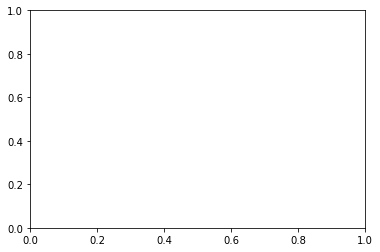

In [13]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
## now transform all data using PCA for visualizing the clusters

In [14]:
pca = PCA(n_components=2)

In [15]:
std_scaler = StandardScaler().fit(df)
df=std_scaler.transform(df)

pca_model=pca.fit(df)
pcadf=pca_model.transform(df)

NameError: name 'df' is not defined

In [16]:
## determine the cluster index vectors and the  pca transformed cluster centers 

indices_cluster1=[]
indices_cluster2=[]
transformed_center1=np.array([0.0,0.0])
transformed_center2=np.array([0.0,0.0])
for i in range(0,df.shape[0]):
    if labels2[i]==0:
        indices_cluster1.append(i)
        transformed_center1=transformed_center1+np.array([pcadf[i][0],pcadf[i][1]])
    else:
        indices_cluster2.append(i)
        transformed_center2=transformed_center2+np.array([pcadf[i][0],pcadf[i][1]])
transformed_center1=transformed_center1/len(indices_cluster1)
transformed_center2=transformed_center2/len(indices_cluster2)

NameError: name 'df' is not defined

In [17]:

df_pairs=[]
for i in range(0,len(df)):
    df_pairs.append([pcadf[i,0],pcadf[i,1]])


plot_clusters(df_pairs,[indices_cluster1,indices_cluster2],["red","green"],[transformed_center1,transformed_center2])

NameError: name 'df' is not defined